# Entrega Final

### Seleccion de tweets con frecuencia

In [229]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

src = pd.read_csv('covid19_tweets.csv')
df = src[['user_name', 'user_location', 'user_description', 'date', 'text',
         'user_followers', 'user_friends', 'user_verified', 'user_favourites', 'hashtags', 'source']]

df.loc['date', :] = pd.to_datetime(df['date'])
df.head(10)

<ipython-input-229-1040681fe479>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['date', :] = pd.to_datetime(df['date'])


,user_name,user_location,user_description,date,text,user_followers,user_friends,user_verified,user_favourites,hashtags,source
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,624.0,950.0,False,18775.0,NaN,Twitter for iPhone
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,2253.0,1677.0,True,24.0,NaN,Twitter for Android
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,9275.0,9525.0,False,7254.0,['COVID19'],Twitter for Android
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,197.0,987.0,False,1488.0,['COVID19'],Twitter for iPhone
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,101009.0,168.0,False,101.0,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,1180.0,1071.0,False,1287.0,"['coronavirus', 'covid19']",Twitter Web App
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,79956.0,54810.0,False,3801.0,"['COVID19', 'Recruiting']",Buffer
7,Derbyshire LPC,NaN,NaN,2020-07-25 12:27:00,You now have to wear face coverings when out s...,608.0,355.0,False,95.0,NaN,TweetDeck
8,Prathamesh Bendre,NaN,"A poet, reiki practitioner and a student of law.",2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,25.0,29.0,False,18.0,"['covid19', 'covidPositive']",Twitter for Android
9,Member of Christ 🇨🇳🇺🇸🇮🇳🇮🇩🇧🇷🇳🇬🇧🇩🇷🇺,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,55201.0,34239.0,False,29802.0,"['HurricaneHanna', 'COVID19']",Twitter for iPhone


### 1. Se obtienen datos sobre las personas etiquetadas.

In [240]:
matches = []; allHashtags = []

def entry(text):
  matches = re.findall("(@\w+)", str(text))
  for i in range(len(matches)):
    matches[i] = matches[i].lower()
  return matches

matchAdd = lambda x: matches.extend(entry(x))
df['text'].apply(matchAdd)

top = 15
contador = Counter(matches).most_common(top)[::-1]# Se obtienen los valores más comunes y se reversa la lista.

print(contador)

[('@narendramodi', 111), ('@mlb', 112), ('@nygovcuomo', 114), ('@chouhanshivraj', 114), ('@cdcgov', 115), ('@whitehouse', 126), ('@joebiden', 134), ('@cnn', 139), ('@borisjohnson', 153), ('@senatemajldr', 154), ('@potus', 180), ('@youtube', 184), ('@gop', 217), ('@who', 245), ('@realdonaldtrump', 2007)]


### 2. Se hace un plot de estos datos.

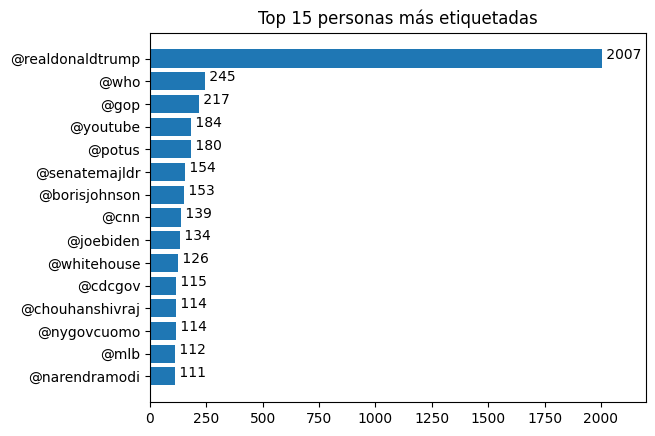

In [243]:
fig, ax = plt.subplots()
ax.barh([d[0] for d in contador], [d[1] for d in contador])
ax.set_xlim([0, 2200])
ax.set_title('Top 15 personas más etiquetadas')
for i in range(len(contador)):
    plt.text(contador[i][1], i, " " + str(contador[i][1]))
plt.show()

### 3. Se mide la frecuencia con la que se menciona una persona.

<Axes: >

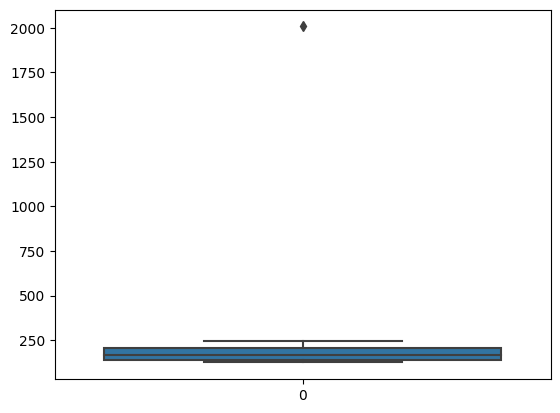

In [235]:
sns.boxplot(data=[g[1] for g in contador], showfliers=True)

# La mediana de tweets es de 170 retweets.

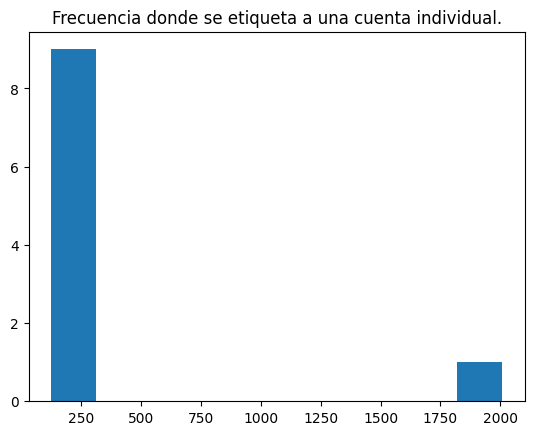

In [236]:
fig, ax = plt.subplots()
ax.hist([h[1] for h in contador])
ax.set_title("Frecuencia donde se etiqueta a una cuenta individual.")
plt.show()

In [245]:
## Histograma con los top 15 tags.
## Buscar si las cuentas más populares aparecen en estos tags.
##
## Comparar cantidad de favoritos que tienen los tweets con estos arrobas. Hacer diagrama de frequencia?
## Buscar la cantidad de cuentas verificadas.
## Comparar la cantidad de followers (?)
## Palabras más frecuentes en la descripción de cada tweet?
## Lo de los hashtags (los cuates)
## topicos
## Regiones???.

# df.head(10)
# df.describe().transpose().head(10)
# src

cobicho = df

allHashtags = []

def entry(list):
  return list

matchAdd = lambda x: allHashtags.extend(entry(x))
df['hashtags'].apply(matchAdd)

top = 15
contador = Counter(matches).most_common(top)[::-1]# Se obtienen los valores más comunes y se reversa la lista.

print(contador)

cobicho[(cobicho['hashtags'] == "['COVID19']") | (cobicho['hashtags'] == "['Covid19']") | (cobicho['hashtags'] == "['covid19']")]

TypeError: ignored

In [ ]:
popular_tweets = df[(df['user_followers'] > 10000) & (df['user_verified'] == True)]
unique_popular_accounts = popular_tweets.drop_duplicates(subset='user_name')
unique_popular_accounts

,user_name,user_location,user_description,date,user_followers,user_friends,user_verified,hashtags,source
21,APO Group English,#AFRICA #MENA,Latest #Africa & #MENA related #News releases ...,2020-07-25 12:26:31,10661,6,True,NaN,Africa Newsroom
25,Blood Donors India,"Mumbai, India",Focused on matching blood donors with those in...,2020-07-25 12:26:26,1215920,2047,True,"['Kolar', 'Blood', 'COVID19']",Blood Donors India
39,ASHP,"Bethesda, Maryland",ASHP — Representing #pharmacists who serve as ...,2020-07-25 12:26:00,32008,3763,True,['COVID19'],Twitter Web App
43,TOI Delhi,"New Delhi, India",Your city. Your neighborhood. Your block. Cove...,2020-07-25 12:25:49,52186,41,True,"['Delhi', 'COVID19']",TweetDeck
60,#IndiaFightsCorona,NaN,Official Government of India updates on #COVID...,2020-07-25 12:25:25,100214,70,True,['IndiaFightsCorona'],Twitter Web App
...,...,...,...,...,...,...,...,...,...
74088,"Steven Marshall, MP","Adelaide, South Australia",Premier of South Australia and Member for Duns...,2020-08-04 03:27:11,31137,5627,True,['COVID19'],Twitter for iPhone
74110,Austin Kellerman,"Dallas, TX",Husband. #GirlDad. Director of Digital Content...,2020-08-04 03:26:14,33095,963,True,['COVID19'],Twitter for iPhone
74135,The Telegraph,"London, UK","Think ahead with the latest news, comment, ana...",2020-08-04 03:25:15,2918619,761,True,NaN,Echobox
74262,SBOBET,NaN,"A place for Trust, Value and Speed. Followers ...",2020-08-04 03:20:00,38641,1150,True,"['PSG', 'COVID19']",TweetDeck


### Hashtags más utilizados por cuentas populares (Histograma?)

Los hashtags más populares de cada región.

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

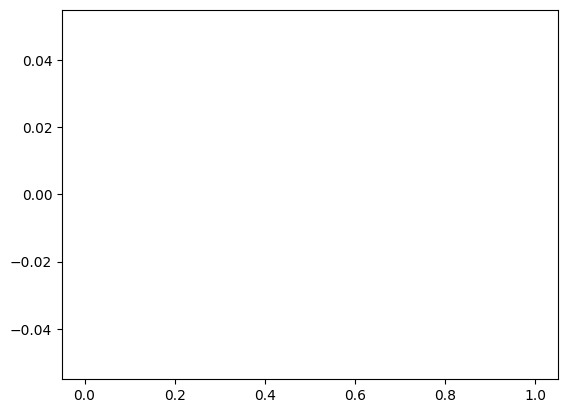

In [ ]:
popular_hashtags = popular_tweets[~popular_tweets['hashtags'].isna()]['hashtags']

popular_hashtags

fig, ax = plt.subplots()
ax.hist(popular_hashtags)
# plt.show()

# Cuentas con más followers.

Analizar los tweets, hashtags, paises del top 100 de cuentas más populares de la plataforma.

De los tweets con más favoritos y con el hashtag de covid, sortear con las cuentas más populares, cuales cuentas están verificadas o no y cuales cuentas son de organización o personales.

In [ ]:
top_follow = df.sort_values('user_followers', ascending=False)
unique_acc_top_follow = top_follow.drop_duplicates(subset='user_name')
top100accounts = unique_acc_top_follow.head(100)

# top 100 tweets
top = 150
tweets_fav = src.sort_values(by=['user_favourites'],ascending=False)
# tweets_fav.head(top)
tweets_fav['user_verified'].value_counts()


False    65082
True      9354
Name: user_verified, dtype: int64

### 1. Hashtags más ocurrentes

In [ ]:
valid_hashtags = df[~df['hashtags'].isna()]
valid_hashtags.values

array([['Time4fisticuffs', 'Pewee Valley, KY',
        '#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020',
        ..., "['COVID19']", 'Twitter for Android', False],
       ['ethel mertz', 'Stuck in the Middle ',
        '#Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist', ...,
        "['COVID19']", 'Twitter for iPhone', False],
       ['DIPR-J&K', 'Jammu and Kashmir',
        '🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kashmir',
        ..., "['CoronaVirusUpdates', 'COVID19']", 'Twitter for Android',
        False],
       ...,
       ["People's Daily app", '北京, 中华人民共和国',
        'Our mission is to provide news and perspectives on China to a global audience. Download the app for news on China.',
        ..., "['China', 'Xinjiang']", 'Twitter Web App', False],
       ['M0ser', nan,
        'Reagan conservative and attorney raised in the 700 level of the Ve

# Cuentas con más de 100k followers

Desde 24 de Julio hasta 4 de Agosto

In [ ]:
top_followers = df[df['user_followers'] > 100000]
top_followers.head(100)

,user_name,user_location,user_description,date,user_followers,user_friends,user_verified,hashtags,source
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2020-07-25 12:27:08,101009,168,False,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android
25,Blood Donors India,"Mumbai, India",Focused on matching blood donors with those in...,2020-07-25 12:26:26,1215920,2047,True,"['Kolar', 'Blood', 'COVID19']",Blood Donors India
60,#IndiaFightsCorona,NaN,Official Government of India updates on #COVID...,2020-07-25 12:25:25,100214,70,True,['IndiaFightsCorona'],Twitter Web App
77,IMF,"Washington, DC",Breaking news and alerts from the Internationa...,2020-07-25 12:25:02,1695520,444,True,['COVID19'],Hootsuite Inc.
78,Oxfam International,NaN,Oxfam is a world-wide development organization...,2020-07-25 12:25:00,843670,1172,True,['Covid19'],Twitter Web App
...,...,...,...,...,...,...,...,...,...
1898,The Quint,NaN,Mobile-first digital news platform. We are the...,2020-07-25 11:25:23,553272,311,True,NaN,TweetDeck
1907,#IndiaFightsCorona,NaN,Official Government of India updates on #COVID...,2020-07-25 11:24:47,100215,70,True,['CoronaVirusUpdates'],Twitter Web App
1908,#IndiaFightsCorona,NaN,Official Government of India updates on #COVID...,2020-07-25 11:24:47,100215,70,True,"['CoronaVirusUpdates', 'COVID19']",Twitter Web App
1915,Blood Donors India,"Mumbai, India",Focused on matching blood donors with those in...,2020-07-25 11:24:11,1215921,2047,True,"['Hyderabad', 'Blood', 'COVID19']",Blood Donors India


# Cuentas entre 100k y 100 followers.

In [ ]:
top_followers = df[(df['user_followers'] < 100000) & (df['user_followers'] > 1000)]
top_followers
print(f'Cantidad de cuentas con 1,000 < F < 100,000: {len(top_followers)}')

Cantidad de cuentas con 1,000 < F < 100,000: 32738


# Cuentas con menos de 1000 followers

In [ ]:
bottom_followers = df[df['user_followers'] < 1000]
bottom_followers
print(f'Cantidad de cuentas con F < 1,000: {len(bottom_followers)}')

Cantidad de cuentas con F < 1,000: 37631
